# Main Climatologic Classes

## ClimatAverage

Init: give year, month and measure wanted
Load the "averages" files
Allows to display them as images


## ClimaticDataWraper

Init: give the [years] wanted

Methods: get measures averages according to coordinates for the 12 months in the specified years

Example: 

```
    wrapper = ClimaticDataWraper(["2016"])
    pereiraCoord = [-75.690601,4.8087174]
    print wrapper.getTminAverages(pereiraCoord)
```
It will give you: 

```
['18.556840133667' '18.5997200775146' '18.6267597961426' '19.1054000854492'
 '19.076600112915' '18.5496399688721' '18.4978398895264' '17.971960067749'
 '18.0743200683594' '17.9921199798584' '18.6911999511719'
 '18.0828800964355']
```


720
720
3.500417
-77.50042
0.00416666700000001
[-77.50042    -77.49625333 -77.49208667 -77.48792    -77.48375333
 -77.47958666 -77.47542    -77.47125333 -77.46708666 -77.46292    -77.45875333
 -77.45458666 -77.45042    -77.44625333 -77.44208666 -77.43791999
 -77.43375333 -77.42958666 -77.42541999 -77.42125333 -77.41708666
 -77.41291999 -77.40875333 -77.40458666 -77.40041999 -77.39625332
 -77.39208666 -77.38791999 -77.38375332 -77.37958666 -77.37541999
 -77.37125332 -77.36708666 -77.36291999 -77.35875332 -77.35458665
 -77.35041999 -77.34625332 -77.34208665 -77.33791999 -77.33375332
 -77.32958665 -77.32541999 -77.32125332 -77.31708665 -77.31291998
 -77.30875332 -77.30458665 -77.30041998 -77.29625332 -77.29208665
 -77.28791998 -77.28375332 -77.27958665 -77.27541998 -77.27125331
 -77.26708665 -77.26291998 -77.25875331 -77.25458665 -77.25041998
 -77.24625331 -77.24208665 -77.23791998 -77.23375331 -77.22958664
 -77.22541998 -77.22125331 -77.21708664 -77.21291998 -77.20875331
 -77.20458664 -7

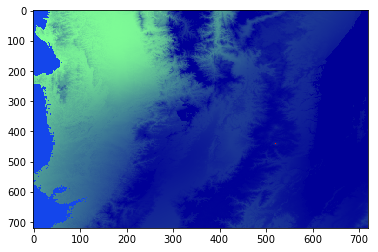

In [19]:
import numpy as np
import math
from PIL import Image
from scipy.misc import toimage
from matplotlib.pyplot import imshow




class ClimatAverages:
    
    def __init__(self, year="2011", month="1", measure="tmin"
                 ,path = "/mnt/hgfs/sharedKali/TB_Data_Meteo/outputs_yearly_v2_2011_2016/average/",):
        
        self.path = str(path)
        self.measure = str(measure)
        self.year = str(year)
        self.month = str(month)
        
        
        records_matrix = open(self.path  + measure + '_' + year + '_' + month + '.asc')
        # Reading the data 
        tmpMatriceData =  [l.strip().split(' ') for l in records_matrix.readlines()[6::]]
        records_matrix.seek(0)
        tmpMatriceInfo =  [l.strip().split(' ') for l in records_matrix.readlines()[:5]]
        self.matriceData = np.array(tmpMatriceData)
        self.matriceInfo = np.array(tmpMatriceInfo)
        records_matrix.close()
        
        self.NCOLS = self.matriceInfo[0,1]
        self.NROW = self.matriceInfo[1,1]
        self.XLLCORNER = self.matriceInfo[2,1]
        self.YLLCORNER = self.matriceInfo[3,1]
        self.CELLSIZE = self.matriceInfo[4,1]
        
        
        self.lons = []
        self.lats = []
        
        basex = float(self.XLLCORNER)
        basey = float(self.YLLCORNER)
        
        # Coordonnées sur x et y (décimal)
        for i in range(0, 720):
            self.lons.append(basex)
            self.lats.append(basey)
            basex += float(self.CELLSIZE)
            basey += float(self.CELLSIZE)
        
        
        self.lons = np.array(self.lons)
        
        self.lats = np.array(self.lats)
        
        # Minimums and maximums
        self.minLon = self.lons[0]
        self.maxLon = self.lons[-1]
        self.minLat = self.lats[0]
        self.maxLat = self.lats[-1]
        
    # The table is a 720 x 720 table
    # TODO: check the coordinate are in the range (in risaralda) and then convert it (lon and lat) in the range 0-720
    
    
    
    def isOnMap(self, lon, lat):
        if(lon < self.minLon or lon > self.maxLon):
            return False
        elif(lat < self.minLat or lat > self.maxLat):
            return False
        else:
            return True
    
    
    # Points: idx of the table you want to be red
    def displayMap(self, points = [None]):
        
        
        NewMax = 255
        NewMin = 0
        
        array2 = np.array(self.matriceData) 
        array2range = []
        
        OldMax = float(-8000)
        OldMin = float(8000)
        
        # Find min and max to then convert the values in another range
        
        for row in self.matriceData:
            for val in row:
                if (float(val) != -9999) and (float(val) < OldMin):
                    OldMin = float(val)
                if (float(val) != -9999) and (float(val) > OldMax):
                    OldMax = float(val)
        
        NewRange = float(NewMax - NewMin)
        NewRange = float(NewRange)
        
        NewMax = float(NewMax)
        NewMin = float(NewMin)
        
        OldRange = float(OldMax) - float(OldMin)
        OldRange = float(OldRange)
        
        # Convert values range (temperature, rain, etc in 0-255 range)
        for row in array2:
            tempLine = []
            for OldValue in row:
                NewValue = 0
                if(float(OldValue) == -9999):
                    color = [20,70,235]
                else:
                    NewValue = float(((float(OldValue) - OldMin) * NewRange) / OldRange) + NewMin
                    color = [int(NewValue)/2, int(NewValue), 150]
                
                tempLine.append(color)
            array2range.append(tempLine)
        array2range = np.array(array2range)
        data = array2range
        
        if(len(points) > 0):
            for point in points:
                data[point[0],point[1]] = [255, 0, 0]
                if(point[0] < 719 and point[0] > 0 and point[1] > 0 and point[1] < 719):
                    data[point[0],point[1]+1] = data[point[0],point[1]-1] = data[point[0]-1,point[1]] = data[point[0]+1,point[1]] = [255, 0, 0]
                    
                
        
        img = toimage(data)
        img.show()
        imshow(img, aspect='auto')
    
    
    # Returns the two table indices corresponding to the nearest coordinates given
    #
    # Params:
    #         - Coordinates [Longitude, Latitude]
    #
    def getNearestCoordIdx(self, coord):
        
        lon = coord[0]
        lat = coord[1]
        idxLon = (np.abs(self.lons-lon)).argmin()
        idxLat = (np.abs(self.lats-lat)).argmin()
        idxLat = np.abs(idxLat - 719)
        
        return [idxLat, idxLon]
    
    
    # Allows to get the nearest value, according to the given coordinates
    #
    # Params: 
    #         - Coordinates [Longitude, Latitude]
    #
    # 
    def getNearestCoordValue(self, coord):
        indices = self.getNearestCoordIdx(coord)
        return self.matriceData[indices[0], indices[1]]
        
        
    
test = ClimatAverages(year="2011", month="1", measure="prec")

#print test.matriceInfo
print test.NCOLS
print test.NROW
print test.YLLCORNER
print test.XLLCORNER
print test.CELLSIZE
print test.lons
print test.lats


# coord pereira: [-75.690601,4.8087174]
# coord nevado del ruiz [-75.3188351,4.8919993]
# coord laguna chinganza [-73.75017,4.52529]
# coord neige etc au nord [-72.2975, 6.4941666] #nooooo

# coord neige sous nevado [-75.32954409252852,4.663619324550555]

#print test.isOnMap(-75.3188351,4.8919993)
#print test.isOnMap(-75.690601,4.8087174)
#print test.isOnMap(-75.690601,4.8087174)
#print test.isOnMap(-72.2975, 6.4941666) # false, not on the map
coordlaguna = [-73.75017,4.52529]
coordnevado = [-75.3188351,4.8919993]
coordpereira = [-75.690601,4.8087174]
coordnevadosud = [-75.32954409252852,4.663619324550555]

coordTest = [-75.3188351,4.8919993]
print("Coord value near nevado del ruiz (snow): {}".format(test.getNearestCoordValue(coordTest)))


print("Coord value near pereira: {}".format(test.getNearestCoordValue(coordpereira)))


print("Coord value near nevado sud: {}".format(test.getNearestCoordValue(coordnevadosud)))


print("Idx on map table for coordnevado {} are {}".format(coordnevado, test.getNearestCoordIdx(coordnevado)))

#test.displayMap([test.getNearestCoordIdx(coordTest)])


#test.displayMap([test.getNearestCoordIdx(coordnevadosud),test.getNearestCoordIdx(coordnevado), test.getNearestCoordIdx(coordpereira)])


test.displayMap([test.getNearestCoordIdx(coordnevadosud),test.getNearestCoordIdx(coordnevado), test.getNearestCoordIdx(coordpereira)])

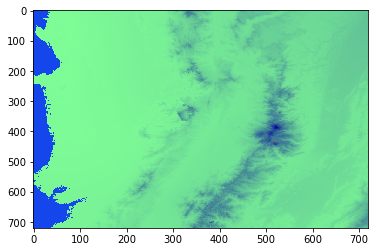

In [25]:
%matplotlib inline
test1 = ClimatAverages(year="2011", month="1", measure="tmin")
test1.displayMap([test.getNearestCoordIdx(coordnevadosud),test.getNearestCoordIdx(coordnevado), test.getNearestCoordIdx(coordpereira)])


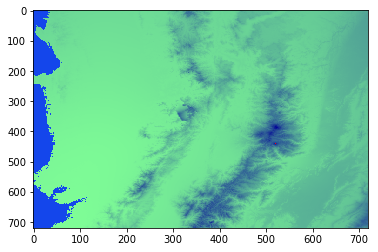

In [22]:
%matplotlib inline
test2 = ClimatAverages(year="2011", month="1", measure="tmax")
test2.displayMap([test.getNearestCoordIdx(coordnevadosud),test.getNearestCoordIdx(coordnevado), test.getNearestCoordIdx(coordpereira)])




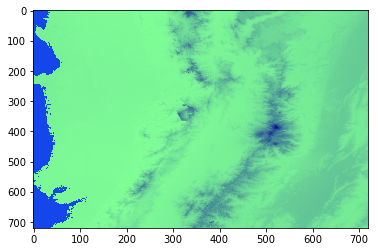

In [23]:
%matplotlib inline
test3 = ClimatAverages(year="2016", month="1", measure="tmean")
test3.displayMap([test.getNearestCoordIdx(coordnevadosud),test.getNearestCoordIdx(coordnevado), test.getNearestCoordIdx(coordpereira)])


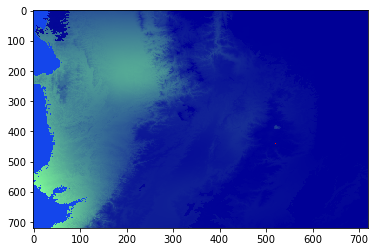

In [24]:
%matplotlib inline
test4 = ClimatAverages(year="2016", month="1", measure="prec")
test4.displayMap([test.getNearestCoordIdx(coordnevadosud),test.getNearestCoordIdx(coordnevado), test.getNearestCoordIdx(coordpereira)])


In [2]:
'''#years = ["2011", "2012", "2013", "2014", "2015", "2016"]
years = ["2016"]
months = ["1","2","3","4","5","6","7","8","9","10","11","12"]

tmaxAverages = []
tminAverages = []
tmeanAverages = []
dtrAverages = []
precAverages = []

for year in years: 
    print("Loading data for {}".format(year))
    for month in months:
        tmaxAverages.append(ClimatAverages(year, month, measure="tmax"))
        tminAverages.append(ClimatAverages(year, month, measure="tmin"))
        tmeanAverages.append(ClimatAverages(year, month, measure="tmean"))
        dtrAverages.append(ClimatAverages(year, month, measure="dtr"))
        precAverages.append(ClimatAverages(year, month, measure="prec"))
        



for tmax in tmaxAverages:
    print("tmax in pereira: {}".format(tmax.getNearestCoordValue([-75.690601,4.8087174])))

for tmin in tminAverages:
    print("tmin in pereira: {}".format(tmin.getNearestCoordValue([-75.690601,4.8087174])))
    
for tmean in tmeanAverages:
    print("tmean in pereira: {}".format(tmean.getNearestCoordValue([-75.690601,4.8087174])))
    
for dtr in dtrAverages:
    print("dtr in pereira: {}".format(dtr.getNearestCoordValue([-75.690601,4.8087174])))
    
for prec in precAverages:
    print("prec in pereira: {}".format(prec.getNearestCoordValue([-75.690601,4.8087174])))'''

'#years = ["2011", "2012", "2013", "2014", "2015", "2016"]\nyears = ["2016"]\nmonths = ["1","2","3","4","5","6","7","8","9","10","11","12"]\n\ntmaxAverages = []\ntminAverages = []\ntmeanAverages = []\ndtrAverages = []\nprecAverages = []\n\nfor year in years: \n    print("Loading data for {}".format(year))\n    for month in months:\n        tmaxAverages.append(ClimatAverages(year, month, measure="tmax"))\n        tminAverages.append(ClimatAverages(year, month, measure="tmin"))\n        tmeanAverages.append(ClimatAverages(year, month, measure="tmean"))\n        dtrAverages.append(ClimatAverages(year, month, measure="dtr"))\n        precAverages.append(ClimatAverages(year, month, measure="prec"))\n        \n\n\n\nfor tmax in tmaxAverages:\n    print("tmax in pereira: {}".format(tmax.getNearestCoordValue([-75.690601,4.8087174])))\n\nfor tmin in tminAverages:\n    print("tmin in pereira: {}".format(tmin.getNearestCoordValue([-75.690601,4.8087174])))\n    \nfor tmean in tmeanAverages:\n    p

In [3]:
#years = ["2011", "2012", "2013", "2014", "2015", "2016"]



class ClimaticDataWraper:
    
    def __init__(self, years):
        
        months = ["1","2","3","4","5","6","7","8","9","10","11","12"]
        
        # All datas
        self.globalTmaxAverages = []
        self.globalTminAverages = []
        self.globalTmeanAverages = []
        self.globalDtrAverages = []
        self.globalPrecAverages = []


        for year in years: 
            print("Loading data for {}".format(year))
            for month in months:
                self.globalTmaxAverages.append(ClimatAverages(year, month, measure="tmax"))
                self.globalTminAverages.append(ClimatAverages(year, month, measure="tmin"))
                self.globalTmeanAverages.append(ClimatAverages(year, month, measure="tmean"))
                self.globalDtrAverages.append(ClimatAverages(year, month, measure="dtr"))
                self.globalPrecAverages.append(ClimatAverages(year, month, measure="prec"))
            print("Done !")
    
    # Coord = [lon, lat]
    def getTminAverages(self, coord):
        dataVector = []
        for tmin in self.globalTminAverages:
            dataVector.append(tmin.getNearestCoordValue([coord[0], coord[1]]))
        return np.array(dataVector)
    
    # Coord = [lon, lat]
    def getTmaxAverages(self, coord):
        dataVector = []
        for tmax in self.globalTmaxAverages:
            dataVector.append(tmax.getNearestCoordValue([coord[0], coord[1]]))
        return np.array(dataVector)
    
    # Coord = [lon, lat]
    def getTmeanAverages(self, coord):
        dataVector = []
        for tmean in self.globalTmeanAverages:
            dataVector.append(tmean.getNearestCoordValue([coord[0], coord[1]]))
        return np.array(dataVector)
    
    # Coord = [lon, lat]
    def getDtrAverages(self, coord):
        dataVector = []
        for dtr in self.globalDtrAverages:
            dataVector.append(dtr.getNearestCoordValue([coord[0], coord[1]]))
        return np.array(dataVector)
    
    # Coord = [lon, lat]
    def getPrecAverages(self, coord):
        dataVector = []
        for prec in self.globalPrecAverages:
            dataVector.append(prec.getNearestCoordValue([coord[0], coord[1]]))
        return np.array(dataVector)
    
    

In [4]:
wrapper = ClimaticDataWraper(["2015","2016"])
pereiraCoord = [-75.690601,4.8087174]

print wrapper.getTminAverages(pereiraCoord)


Loading data for 2015
Done !
Loading data for 2016
Done !
['17.2959199523926' '17.4722399139404' '17.3684800720215'
 '17.6135599517822' '17.7207201385498' '17.64083984375' '17.3065599822998'
 '17.2372400665283' '17.029400177002' '17.0854800415039' '17.154640045166'
 '17.362559967041' '17.4172400665283' '17.6748400878906' '17.6565200805664'
 '17.5156398773193' '17.6239200592041' '17.8095598602295'
 '17.3190397644043' '17.0813599395752' '16.8428800201416' '17.102799911499'
 '17.2396798706055' '17.2822400665283']


In [5]:
print wrapper.getPrecAverages(pereiraCoord)

['86.2457595825195' '178.724359130859' '200.7299609375' '242.72948059082'
 '251.526079101562' '142.535358886719' '81.7928799438477' '118.14924041748'
 '161.352800292969' '260.304917602539' '257.338278198242'
 '131.185120849609' '94.4830801391602' '112.643120117187'
 '196.330160522461' '259.672923583984' '234.799360351563'
 '99.0724807739258' '92.1208795166016' '87.7914801025391'
 '100.820559997559' '235.869760742188' '216.272279663086'
 '60.5097196960449']
